Training Set
Number of Structures: 1800
RMSD <1: {'_br0': 12, '_br1': 10, 'e010': 3, 'e011': 2, 'e012': 2, '_br2': 9, 'e031': 3, 'e032': 1, 'e041': 2, 'e042': 1, 'e052': 2, 'e070': 1, 'e072': 1, 'e080': 3, 'e081': 3, 'e082': 2, 'e090': 2, 'e091': 2, 'rn04': 1, 'rn05': 1, 'rn13': 1, 'rn17': 1, 'rn25': 1, 'rn26': 1, 'rn36': 1, 'rn47': 1, 'rn48': 1, 'rn57': 1, 'rn62': 1, 'rn64': 1, 'rn69': 1, 'rn73': 1, 'rn75': 1, 'rn82': 1, 'rn83': 1, 'rn85': 1, 'rn88': 1, 'e020': 1, 'e050': 1, 'e051': 1, 'rn01': 1, 'rn27': 1, 'rn51': 1, 'rn55': 1, 'rn59': 1, 'e030': 2, 'e060': 1, 'e061': 1, 'e062': 1, 'e092': 1}
RMSD = 0: 17


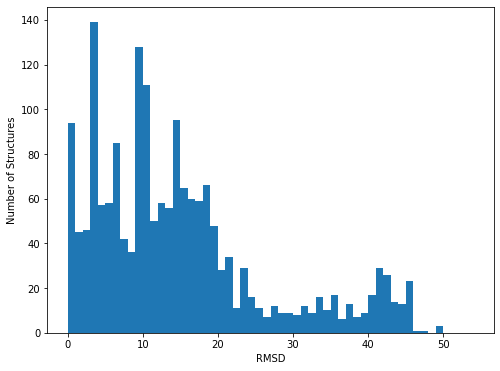

In [5]:
import matplotlib.pyplot as plt

for i, list in enumerate(["/scr/risa/mgeyer/data/test_str_rmsd.txt"]): #(["../data/train_rmsd_list.txt", "../data/truncated_train_rmsd.txt", "../data/val_rmsd_list.txt", "../data/test_rmsd_list.txt", "../data/old_train_rmsd_list.txt"]):
    with open(list) as fh:
        rmsd_list = []
        count_dict = {}
        rmsd_zero = 0
        for line in fh.readlines():
            name, rmsd = (line.rstrip()).split("\t")
            rmsd = float(rmsd)
            rmsd_list.append(rmsd)

            if rmsd == 0:
                rmsd_zero += 1    
            if rmsd < 1:
                if name[-6:-3] == "001" or name[-7:-5] == "rf":
                    if "pdb" not in count_dict:
                        count_dict["pdb"] = 1
                    else:
                        count_dict["pdb"] += 1
                else:
                    cat = name[-7:-3]
                    if cat not in count_dict:
                        count_dict[cat] = 1
                    else:
                        count_dict[cat] += 1
    if i == 0:
        print("Training Set")
    elif i == 1:
        print("Truncated Training Set")
    elif i == 2:
        print("Validation Set")
    elif i == 3:
        print("Test Set")
    elif i == 4:
        print("5S rRNAs and tRNAs with replica exchange")
    print("Number of Structures:", len(rmsd_list))
    print("RMSD <1:", count_dict)
    print("RMSD = 0:", rmsd_zero)
    fig, axs = plt.subplots(figsize=(8, 6))#layout='constrained', figsize=(8, 6))
    axs.hist(rmsd_list, bins = range(int(min(rmsd_list)), int(max(rmsd_list))+1, 1))
    axs.set_xlabel("RMSD")
    axs.set_ylabel("Number of Structures")
    plt.show()

In [1]:
#comparison ares prediction and RMSD Calc of Ernwin Structures
import csv
import os

rmsd_list = "trunc_test_rmsd.txt"
ares_csv = "ares_preds.csv"

rmsd_dict = {}
with open(rmsd_list, "r") as rfh:
    for line in rfh.readlines():
        name, rmsd = (line.rstrip()).split("\t")
        rmsd_dict[name[:-3]] = [float(rmsd)]

with open(ares_csv, "r") as afh:
    csv_r = csv.DictReader(afh)
    for i, row in enumerate(csv_r):
        name = row["id"][:-16]
        pred = float(row["pred"])
        if name in rmsd_dict:
            rmsd_dict[name].append(pred)

label_dict = {}
with open("test_id.txt", "r") as fh:
    for line in fh.readlines():
        line = line.rstrip().split(" ")
        label_dict[line[0]] = [line[1], line[2]]



444 samples compared
LinregressResult(slope=2.664491770195672, intercept=-3.052761958152658, rvalue=0.32316459022103095, pvalue=2.98514189574323e-12, stderr=0.3711316146213851, intercept_stderr=3.6640297727926514)


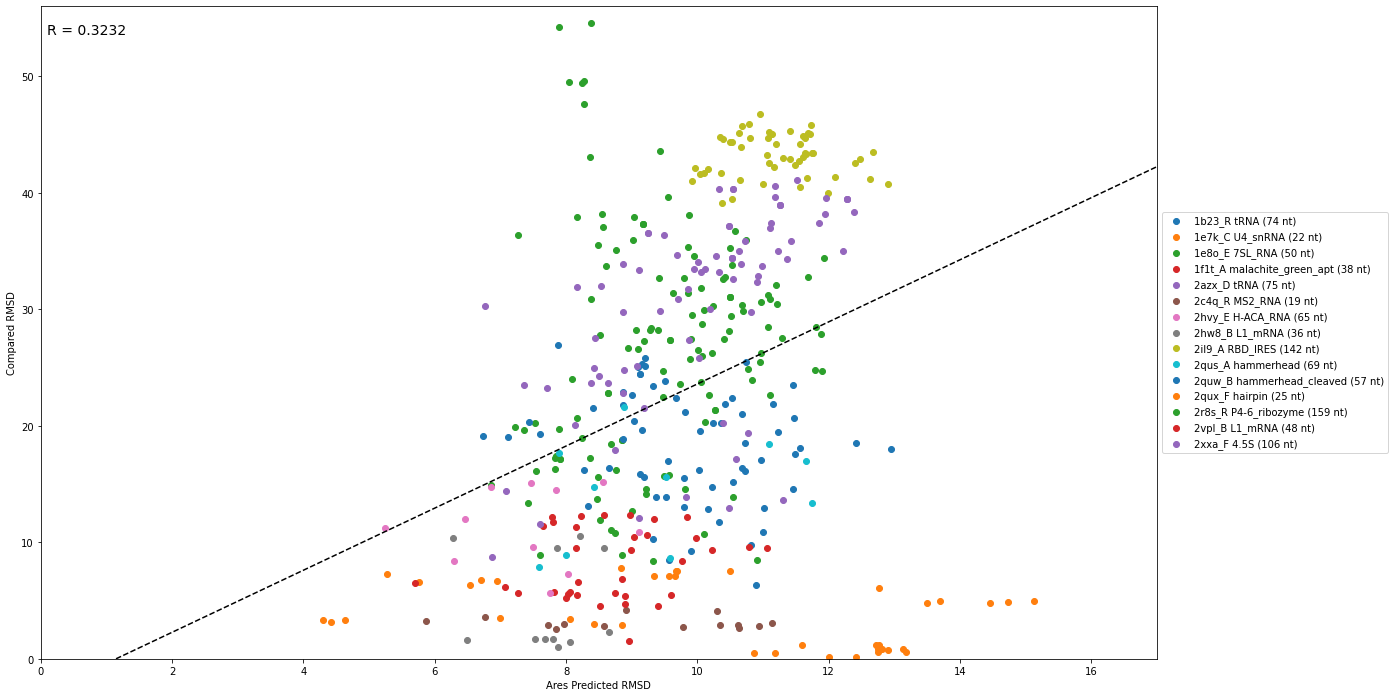

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import math



pred = []
true = []
samples = {}
c = 0
for name, values in rmsd_dict.items():
    if len(values) == 2:
        c += 1
        pred.append(values[1])
        true.append(values[0])
        if name[:6] in samples:
            samples[name[:6]][1].append(values[1])
            samples[name[:6]][0].append(values[0])
        else:
            samples[name[:6]] = [[values[0]],[values[1]]]

print(f"{c} samples compared")
reg = linregress(pred, true)
print(reg)
fig, ax1 = plt.subplots(figsize=(20, 12))#, gridspec_kw={'width_ratios': [5, 1]})#, layout='constrained')
for name in sorted(samples):
    ax1.scatter(samples[name][1], samples[name][0], label=f"{str(name)} {label_dict[name][0]} ({label_dict[name][1]} nt)")
ax1.axline(xy1=(0, reg.intercept), slope=reg.slope, linestyle="--", color="k")
ax1.text(0.1, max(true), f"R = {reg.rvalue:.4f}", fontsize = 14, va="top", ha="left")
#ax2.violinplot(losses, showextrema=True, showmedians=True, quantiles=[0.25, 0.75])# boxplot(losses)
#ax1.set_title("Predicted vs True RMSDs")
ax1.set_ylabel("Compared RMSD")
ax1.set_xlabel("Ares Predicted RMSD")
ax1.set_ylim([0, math.ceil(max(true)) + 1])
ax1.set_xlim([0, math.ceil(max(pred)) + 1])

han, lab = ax1.get_legend_handles_labels()

plt.legend(han, lab, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()